In [11]:
import numpy as np
from time import time
import matplotlib.pyplot as plt

## Question 1
##### 1.1)

In [23]:
def generic_grad(f, gf, lsearch, x0, eps):
    x = x0
    fs = []
    gs = []
    ts = []
    start = time()
    t = lsearch(f, x0, gf(x0))
    x_k = x - t * gf(x)
    fs.append(f(x_k))
    gs.append(np.linalg.norm(gf(x_k)))
    stop = time()
    ts.append(stop - start)
    while abs(f(x) - f(x_k)) >= eps:
        x = x_k
        t = lsearch(f, x, gf(x))
        x_k = x - t * gf(x)
        fs.append(f(x_k))
        gs.append(np.linalg.norm(gf(x_k)))
        stop = time()
        ts.append(stop - start)
    fs = np.concatenate(fs, axis=0)
    gs = np.array(gs)
    return x_k, fs, gs, ts

##### 1.2)

In [24]:
def const_step(s):
    if s <= 0:
        raise ValueError ("S should be positive.")
    def inner_func(f, xk, gk):
        return s
    return inner_func        

In [25]:
def exact_quad(A):
    try:
        np.linalg.cholesky(A)
        def inner_func(f, xk, gk):
            return 0.5*((np.linalg.norm(gk)/np.linalg.norm(A@gk)) ** 2)
        return inner_func  
    except:
        raise ValueError("A Incompatable")
          

In [26]:
def back(alpha, beta, s):
    if alpha <= 0 or beta <= 0 or alpha >= 1 or beta >= 1 or s <= 0:
        raise ValueError ("Incompatible values.")
    def inner_func(f, xk, gk):
        t = s
        while f(xk - t*gk) >= f(xk) - alpha * t * np.linalg.norm(gk) ** 2:
            t *= beta
        return t
    return inner_func

##### 1.3)

In [27]:
A = np.arange(1,26).reshape((5,5))
np.fill_diagonal(A,100)
f = lambda x: x.T @ A.T @ A @ x
gf = lambda x: 2 * A.T @ A @ x
x0 = np.ones((5,1))
s = 1/(2*max(np.linalg.eigvals(A.T @ A)))

In [28]:
x1, fs1, gs1, ts1 = generic_grad(f,gf,const_step(s),x0, 10**-5)

In [29]:
x2, fs2, gs2, ts2 = generic_grad(f,gf,exact_quad(A),x0, 10**-5)

In [30]:
x3, fs3, gs3, ts3 = generic_grad(f,gf,back(0.5,0.5,1),x0, 10**-5)

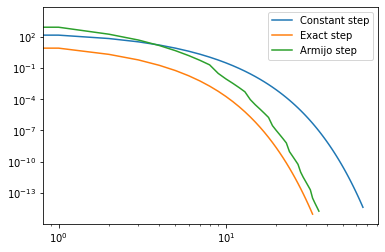

In [31]:
plt.loglog(fs1, label="Constant step")
plt.loglog(fs2, label="Exact step")
plt.loglog(fs3, label="Armijo step")
plt.legend()
plt.show()

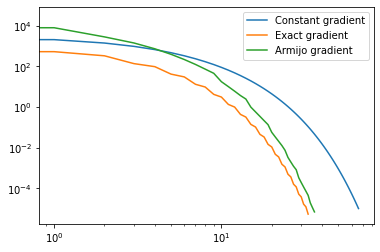

In [32]:
plt.loglog(gs1, label="Constant gradient")
plt.loglog(gs2, label="Exact gradient")
plt.loglog(gs3, label="Armijo gradient")
plt.legend()
plt.show()

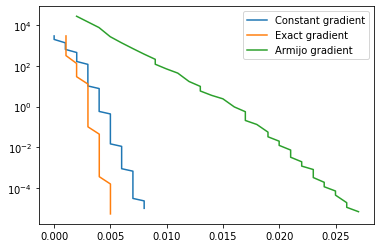

In [33]:
plt.semilogy(ts1,gs1, label = "Constant gradient")
plt.semilogy(ts2,gs2, label = "Exact gradient")
plt.semilogy(ts3,gs3, label = "Armijo gradient")
plt.legend()
plt.show()